In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
years = list(range(1991,2022))

In [2]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [10]:
driver = webdriver.Chrome(executable_path="C:/Users/Swapnil/chromedriver")

In [5]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [6]:
for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("player/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [11]:
for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    html = driver.page_source
    
    with open("player/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(html)

KeyboardInterrupt: 

In [8]:
year = 2020
with open("player/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
soup = BeautifulSoup(page, 'html.parser')
soup.find('tr', class_="thead").decompose()
player_table = soup.find(id="per_game_stats")
player = pd.read_html(str(player_table))[0]
player["Year"] = year


In [9]:
player

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
672,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
673,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
674,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [12]:
player.to_csv("player.csv")

In [3]:
player_df = pd.read_csv("player.csv")

In [4]:
del player_df["Unnamed: 0"]

In [5]:
del player_df["Rk"]

In [6]:
player_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
672,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
673,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
674,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [10]:
player["Player"] = player["Player"].str.replace("*","", regex=False)

In [26]:
player_df

In [12]:
players_df = player_df.iloc[:,[0,1,2,3,]]

In [29]:
players_df

,Player,Pos,Age,Tm
0,Steven Adams,C,26,OKC
1,Bam Adebayo,PF,22,MIA
2,LaMarcus Aldridge,C,34,SAS
3,Kyle Alexander,C,23,MIA
4,Nickeil Alexander-Walker,SG,21,NOP
...,...,...,...,...
671,Trae Young,PG,21,ATL
672,Cody Zeller,C,27,CHO
673,Tyler Zeller,C,30,SAS
674,Ante Žižić,C,23,CLE


In [57]:
teams = pd.read_csv("teams_df.csv")

In [59]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards']

In [61]:
sorted(player_df["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'TOT',
 'Tm',
 'UTA',
 'WAS']

In [86]:
nicknames = {}
with open("nicknames.csv",encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [93]:
player_df["Team"]=player_df["Tm"].map(nicknames)

In [94]:
player_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Team
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020,Oklahoma City Thunder
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020,Miami Heat
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020,San Antonio Spurs
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020,Miami Heat
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020,New Orleans Pelicans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020,Atlanta Hawks
672,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020,Charlotte Hornets
673,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,San Antonio Spurs
674,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020,Cleveland Cavaliers


In [99]:
players_df = player_df.iloc[:,[0,1,2,30,]]

In [100]:
players_df

,Player,Pos,Age,Team
0,Steven Adams,C,26,Oklahoma City Thunder
1,Bam Adebayo,PF,22,Miami Heat
2,LaMarcus Aldridge,C,34,San Antonio Spurs
3,Kyle Alexander,C,23,Miami Heat
4,Nickeil Alexander-Walker,SG,21,New Orleans Pelicans
...,...,...,...,...
671,Trae Young,PG,21,Atlanta Hawks
672,Cody Zeller,C,27,Charlotte Hornets
673,Tyler Zeller,C,30,San Antonio Spurs
674,Ante Žižić,C,23,Cleveland Cavaliers


In [104]:
import numpy as np
players_df_og = players_df.replace(np.nan, 0)

In [105]:
players_df_og

,Player,Pos,Age,Team
0,Steven Adams,C,26,Oklahoma City Thunder
1,Bam Adebayo,PF,22,Miami Heat
2,LaMarcus Aldridge,C,34,San Antonio Spurs
3,Kyle Alexander,C,23,Miami Heat
4,Nickeil Alexander-Walker,SG,21,New Orleans Pelicans
...,...,...,...,...
671,Trae Young,PG,21,Atlanta Hawks
672,Cody Zeller,C,27,Charlotte Hornets
673,Tyler Zeller,C,30,San Antonio Spurs
674,Ante Žižić,C,23,Cleveland Cavaliers


In [106]:
players_df_og.to_csv("player_df.csv") 

In [107]:
import mysql.connector
NBA_sql = mysql.connector.connect(host = 'localhost', user = 'root',passwd = '@Lamborgini1998', database = 'NBA_WS', auth_plugin='mysql_native_password')
mycursor = NBA_sql.cursor()

In [108]:
for i,row in players_df_og.iterrows():   
    sql = "INSERT INTO NBA_WS.PLAYER values (%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    print("Record inserted")
    NBA_sql.commit()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

In [120]:
player_Stats_df = player_df.iloc[:,[0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]

In [121]:
player_Stats_df

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,2,0,6.5,0.5,1.0,.500,0.0,0.0,NaN,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Trae Young,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
672,Cody Zeller,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
673,Tyler Zeller,2,0,2.0,0.5,2.0,.250,0.0,0.0,NaN,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
674,Ante Žižić,22,0,10.0,1.9,3.3,.569,0.0,0.0,NaN,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [19]:
!pip install numpy

In [20]:
import numpy as np

In [122]:
player_Stats_df_1 = player_Stats_df.replace(np.nan, 0)

In [124]:
player_Stats_df_1.to_csv("player_Stats.csv")

In [125]:
for i,row in player_Stats_df_1.iterrows():   
    sql = "INSERT INTO NBA_WS.PLAYER_STATS values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    print("Record inserted")
    NBA_sql.commit()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record i

In [134]:
DF_Player = pd.read_csv("player_df_vis.csv")

In [135]:
display(DF_Player)

,Unnamed: 0,Player,Pos,Age,Team
0,0,Steven Adams,C,26,Oklahoma City Thunder
1,1,Bam Adebayo,PF,22,Miami Heat
2,2,LaMarcus Aldridge,C,34,San Antonio Spurs
3,3,Kyle Alexander,C,23,Miami Heat
4,4,Nickeil Alexander-Walker,SG,21,New Orleans Pelicans
5,5,Grayson Allen,SG,24,Memphis Grizzlies
6,6,Jarrett Allen,C,21,Brooklyn Nets
7,7,Kadeem Allen,PG,27,New York Knicks
8,8,Al-Farouq Aminu,PF,29,Orlando Magic
9,9,Justin Anderson,SG,26,Brooklyn Nets


In [129]:
import matplotlib.pyplot as plt

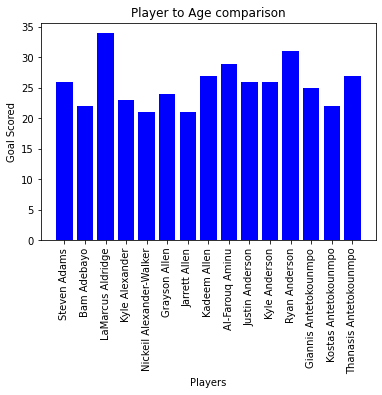

In [137]:
plt.bar("Player", "Age", data = DF_Player, color = "blue")
plt.xlabel("Players")
plt.ylabel("Goal Scored")
plt.title("Player to Age comparison")
plt.xticks(rotation = 90)
plt.show()